In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
from scipy import stats
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

import xgboost as xg

In [115]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [116]:
df = pd.read_csv('Webdevelopment.csv')

In [117]:
df.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject,Date,Free/Paid
0,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0,268923,8629,45,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Web Development,2013-02-14,Free
1,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0,161029,279,27,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Web Development,2013-06-09,Free
2,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200,121584,27445,342,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Web Development,2015-11-02,Paid
3,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0,120291,5924,30,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Web Development,2014-04-08,Free
4,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200,114512,22412,304,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Web Development,2016-03-08,Paid


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   int64  
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   int64  
 4   num_subscribers      3676 non-null   int64  
 5   num_reviews          3676 non-null   int64  
 6   num_lectures         3676 non-null   int64  
 7   level                3676 non-null   object 
 8   rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3676 non-null   object 
 12  Date                 3676 non-null   object 
 13  Free/Paid            3676 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 402.2+ KB


In [119]:
print(min(df['Date']),'-',max(df['Date']))

2011-07-09 - 2017-07-06


### This is the date range that covers this dataset

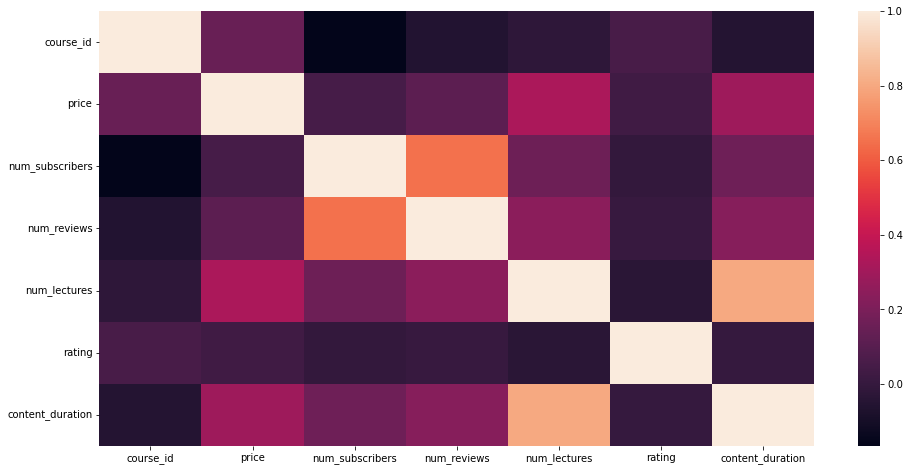

In [120]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr())
plt.show()

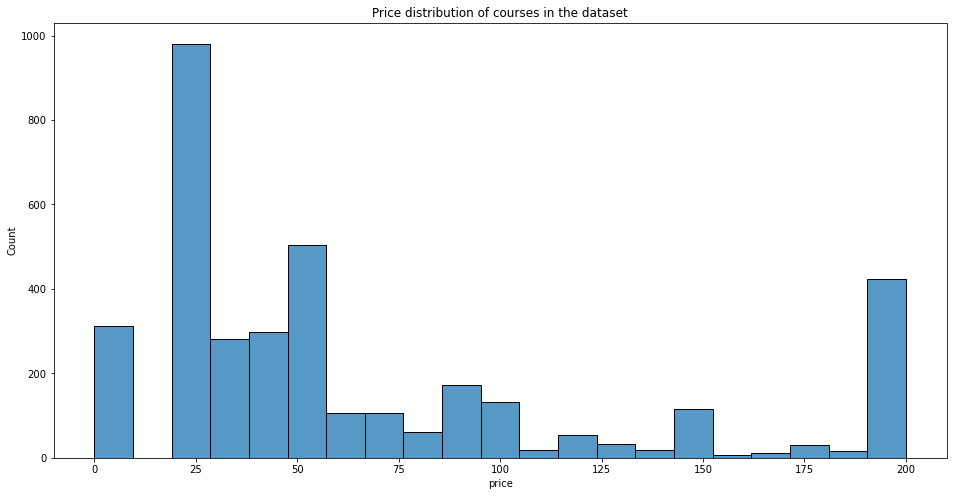

Mean:66.11534276387377


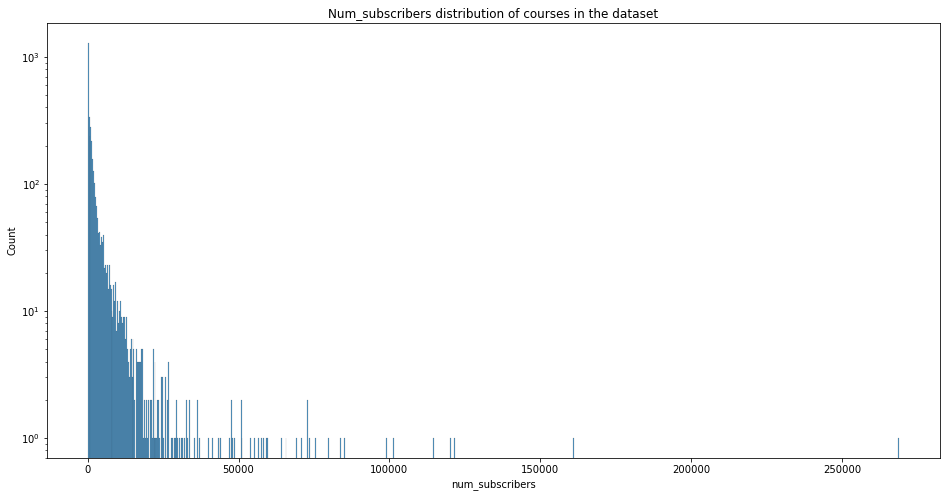

Mean:3199.260881392818


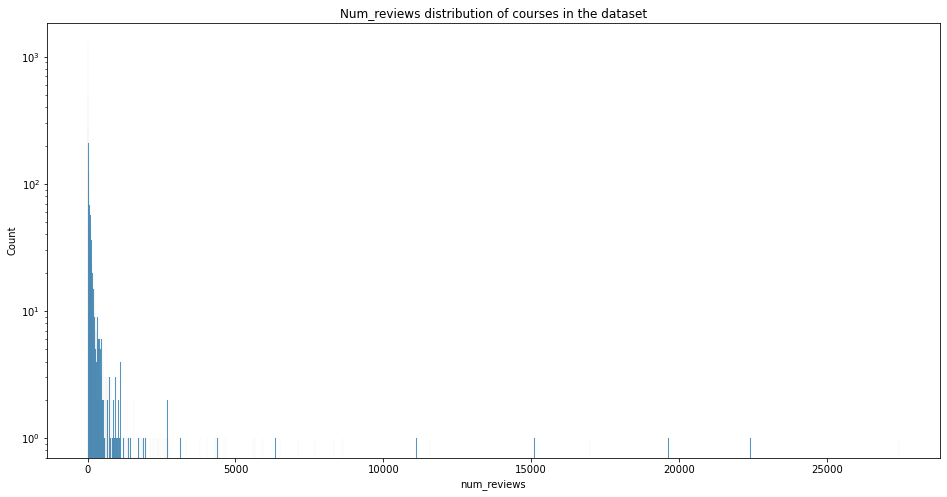

Mean:156.30984766050054


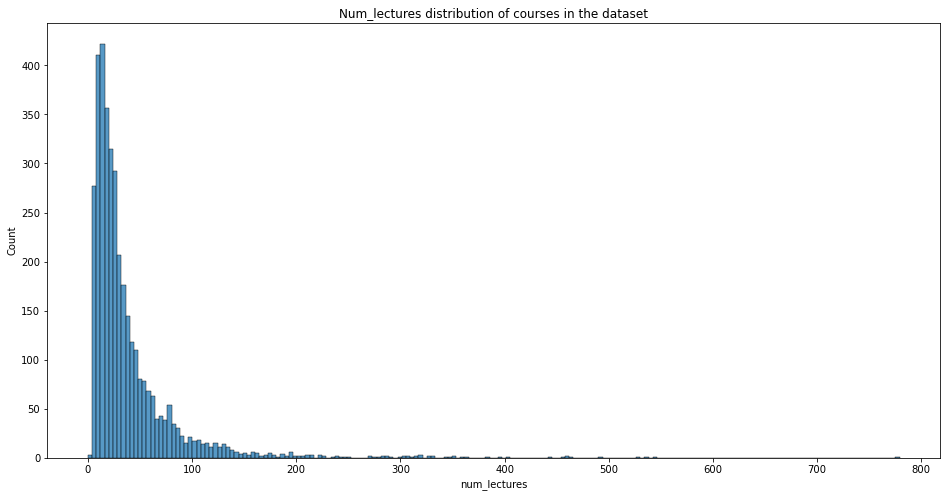

Mean:40.129760609357994


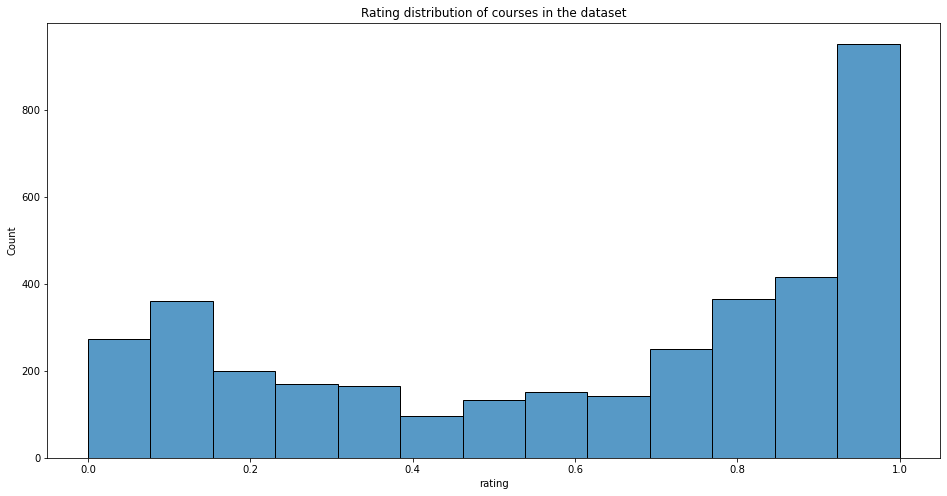

Mean:0.6108677910772597


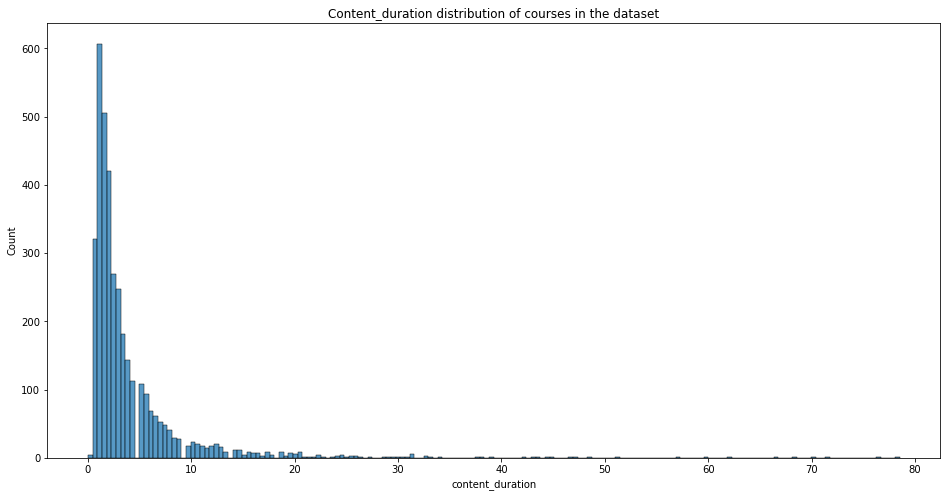

Mean:4.096137105549593


In [121]:
for column in df.columns:
    if df[column].dtype != 'object' and column != 'course_id':
        plt.figure(figsize=(16,8))
        sns.histplot(data=df,x=column)
        if np.std(df[column]) > 100:
            plt.yscale('log')
        else:
            plt.yscale('linear')
        plt.title(label= column.capitalize()+' distribution of courses in the dataset')
        plt.show()
        print('Mean:'+str(np.mean(df[column])))

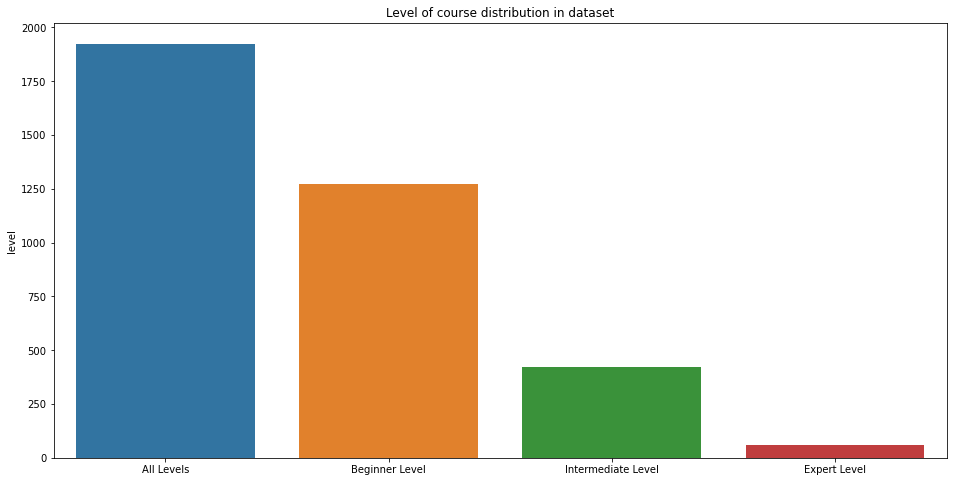

In [122]:
colors = ['blue','red','green','orange']
plt.figure(figsize=(16,8))
sns.barplot(x=df['level'].value_counts().keys(),
            y=df['level'].value_counts())
plt.title(label='Level of course distribution in dataset')
plt.show()

In [123]:
levels = ['All Levels','Beginner Level','Intermediate Level','Expert Level']
numbers = []
for i in df['subject'].unique():
    tempDF = df[df['subject']==i]
    for j in levels:
        numbers.append([i,j,len(tempDF[tempDF['level']==j])])
data = {
    'Subject':[i[0] for i in numbers],
    'Level':[i[1] for i in numbers],
    'Count':[i[2] for i in numbers]
}
splitDF = pd.DataFrame(numbers,columns=['Subject','Level','Count'])

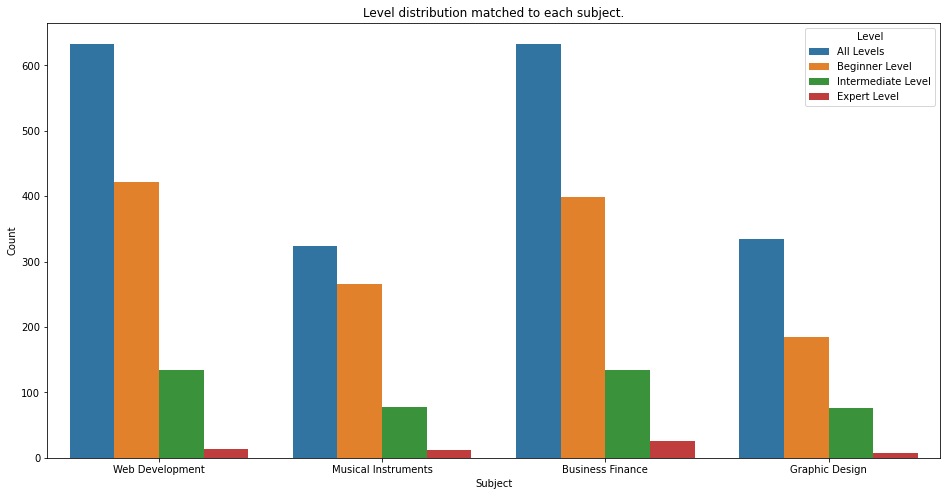

In [124]:
plt.figure(figsize=(16,8))
sns.barplot(data=splitDF,x='Subject',y='Count',hue='Level')
plt.title(label='Level distribution matched to each subject.')
plt.show()

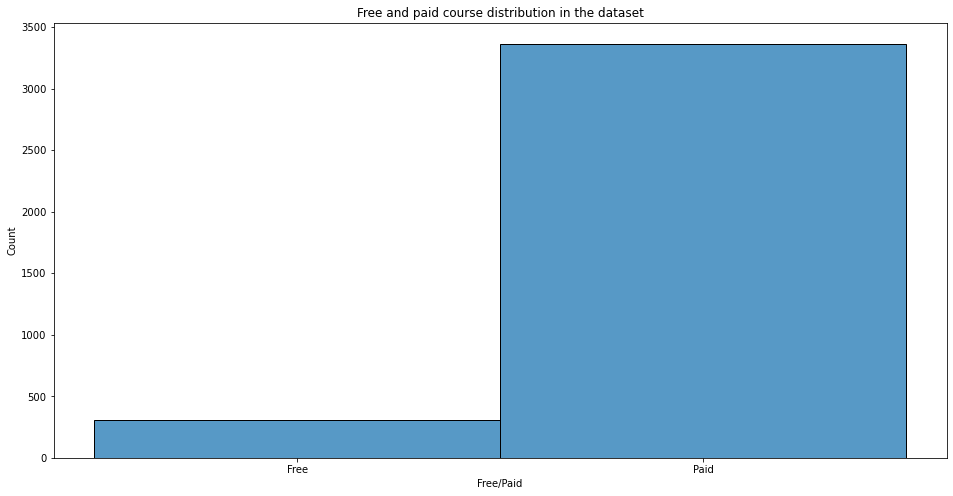

In [125]:
plt.figure(figsize=(16,8))
sns.histplot(data=df,x='Free/Paid')
plt.title(label='Free and paid course distribution in the dataset')
plt.show()

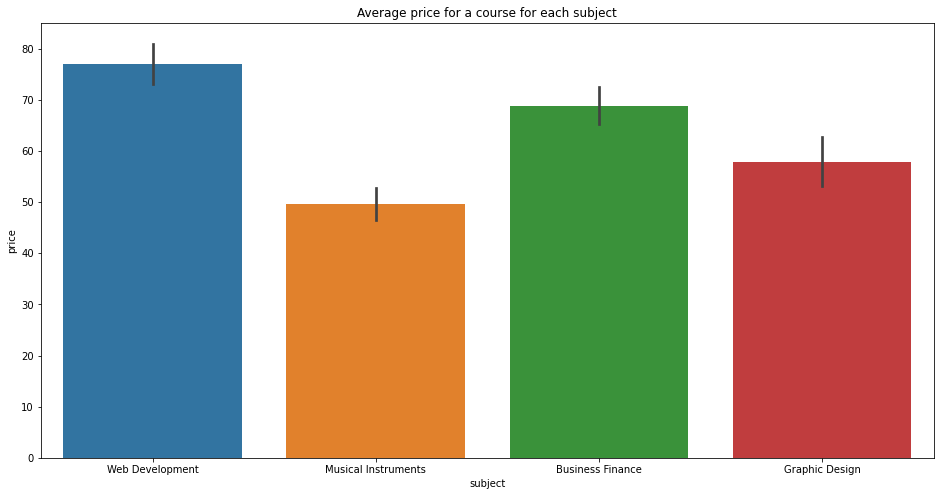

In [126]:
plt.figure(figsize=(16,8))
sns.barplot(data=df,x='subject',y='price')
plt.title(label='Average price for a course for each subject')
plt.show()

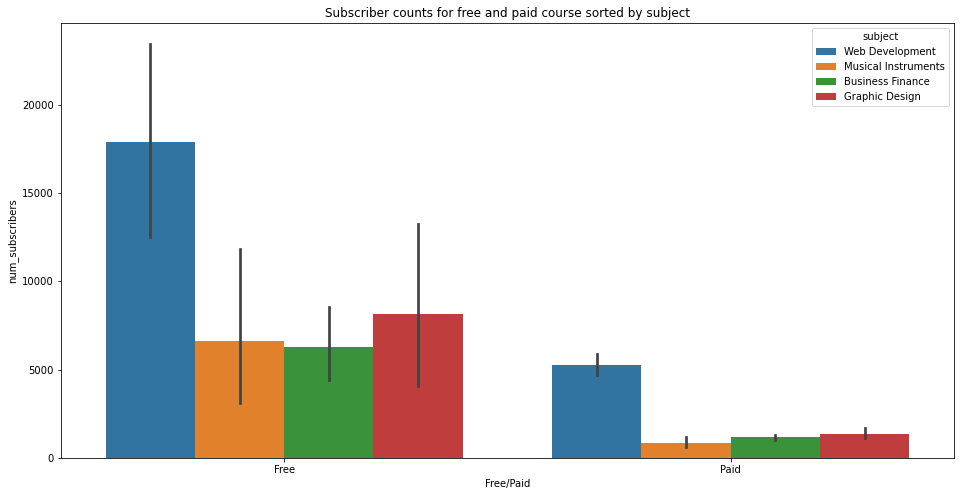

In [127]:
plt.figure(figsize=(16,8))
sns.barplot(data=df,x='Free/Paid',y='num_subscribers',hue='subject')
plt.title(label='Subscriber counts for free and paid course sorted by subject')
plt.show()

In [128]:
le = preprocessing.LabelEncoder()
le.fit(list(df['Free/Paid']))
newList = le.transform(list(df['Free/Paid']))
df['Encoded_Free/Paid'] = newList

le = preprocessing.LabelEncoder()
le.fit(list(df['Date']))
newList = le.transform(list(df['Date']))
df['Encoded_Date'] = newList

le = preprocessing.LabelEncoder()
le.fit(list(df['subject']))
newList = le.transform(list(df['subject']))
df['Encoded_Subject'] = newList

le = preprocessing.LabelEncoder()
le.fit(list(df['level']))
newList = le.transform(list(df['level']))
df['Encoded_Level'] = newList

le = preprocessing.LabelEncoder()
le.fit(list(df['Date']))
newList = le.transform(list(df['Date']))
df['Encoded_Date'] = newList

In [129]:
df.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject,Date,Free/Paid,Encoded_Free/Paid,Encoded_Date,Encoded_Subject,Encoded_Level
0,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0,268923,8629,45,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Web Development,2013-02-14,Free,0,53,3,1
1,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0,161029,279,27,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Web Development,2013-06-09,Free,0,93,3,2
2,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200,121584,27445,342,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Web Development,2015-11-02,Paid,1,688,3,1
3,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0,120291,5924,30,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Web Development,2014-04-08,Free,0,251,3,0
4,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200,114512,22412,304,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Web Development,2016-03-08,Paid,1,799,3,1


In [130]:
numericalFeatures = []
for i in df.columns:
    if df[i].dtype != 'object':
        numericalFeatures.append(i)
features = [i for i in numericalFeatures if i != 'price']
X = df[features]
y = df[['price']]

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [131]:
X

array([[-1.8492816 , 28.01429034,  9.05640012, ..., -2.11477279,
         1.19150508,  0.28995104],
       [-1.79763532, 16.63941713,  0.13114266, ..., -1.98896756,
         1.19150508,  1.33184746],
       [-0.14733864, 12.4808738 , 29.16869286, ..., -0.11761472,
         1.19150508,  0.28995104],
       ...,
       [ 1.11135106, -0.33728647, -0.16707852, ...,  1.1184217 ,
        -1.21639634,  2.37374387],
       [ 1.69903844, -0.33728647, -0.16707852, ...,  1.50212766,
        -1.21639634, -0.75194537],
       [ 1.62213594, -0.33728647, -0.16707852, ...,  1.49898253,
        -1.21639634, -0.75194537]])

In [132]:
# Installing required libraries
!pip install tensorflow
!pip install keras

In [133]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

In [134]:
# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=10, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=1)

Epoch 1/5
172/172 [==============================] - 1s 2ms/step - loss: 0.9554
Epoch 2/5
172/172 [==============================] - 0s 2ms/step - loss: 0.7555
Epoch 3/5
172/172 [==============================] - 0s 2ms/step - loss: 0.7253
Epoch 4/5
172/172 [==============================] - 0s 2ms/step - loss: 0.7172
Epoch 5/5
172/172 [==============================] - 0s 2ms/step - loss: 0.7115


In [135]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 30, 25]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            MAPE=mean_absolute_percentage_error(y_test, model.predict(X_test))

            
            print(MAPE)
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

35/35 [==============================] - 0s 1ms/step
1.2582707889698248
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 98.74172921103018


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6896\1739720499.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


35/35 [==============================] - 0s 1ms/step
1.2533397975793128
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 98.74666020242068


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6896\1739720499.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


35/35 [==============================] - 0s 2ms/step
1.3030953868285675
3 Parameters: batch_size: 5 - epochs: 30 Accuracy: 98.69690461317143


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6896\1739720499.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


35/35 [==============================] - 0s 1ms/step
1.2720346246259586
4 Parameters: batch_size: 5 - epochs: 25 Accuracy: 98.72796537537404


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6896\1739720499.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


35/35 [==============================] - 0s 1ms/step
1.051003150213484
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 98.94899684978651


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6896\1739720499.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


35/35 [==============================] - 0s 1ms/step
1.317903866942584
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 98.68209613305741


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6896\1739720499.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


35/35 [==============================] - 0s 2ms/step
1.3148385569761887
7 Parameters: batch_size: 10 - epochs: 30 Accuracy: 98.68516144302382


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6896\1739720499.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


35/35 [==============================] - 0s 1ms/step
1.3414161220097593
8 Parameters: batch_size: 10 - epochs: 25 Accuracy: 98.65858387799024


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6896\1739720499.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


35/35 [==============================] - 0s 1ms/step
1.197737110694118
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 98.80226288930588


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6896\1739720499.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


35/35 [==============================] - 0s 992us/step
1.2423866571367057
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 98.7576133428633


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6896\1739720499.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


35/35 [==============================] - 0s 1ms/step
1.2851401274558678
11 Parameters: batch_size: 15 - epochs: 30 Accuracy: 98.71485987254414


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6896\1739720499.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


35/35 [==============================] - 0s 1ms/step
1.2207531416265764
12 Parameters: batch_size: 15 - epochs: 25 Accuracy: 98.77924685837343


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6896\1739720499.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


35/35 [==============================] - 0s 1ms/step
1.2384779885899109
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 98.7615220114101


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6896\1739720499.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


35/35 [==============================] - 0s 1ms/step
1.2696741976760708
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 98.73032580232393


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6896\1739720499.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


35/35 [==============================] - 0s 1ms/step
1.243325698373559
15 Parameters: batch_size: 20 - epochs: 30 Accuracy: 98.75667430162645


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6896\1739720499.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


35/35 [==============================] - 0s 1ms/step
1.2805952287086604
16 Parameters: batch_size: 20 - epochs: 25 Accuracy: 98.71940477129134


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6896\1739720499.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


<AxesSubplot:xlabel='Parameters'>

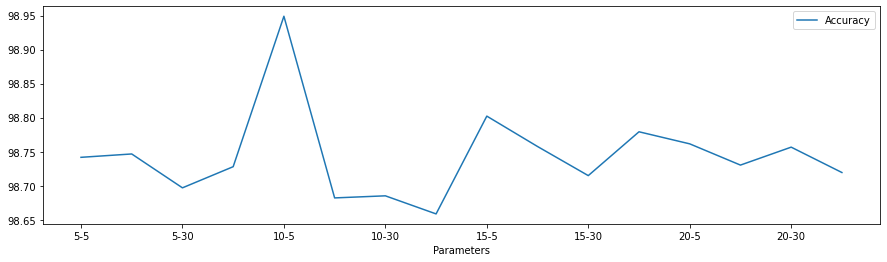

In [136]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

Using best parameters to get optimal performance

In [137]:
##Using best parameters###############################
model.fit(X_train, y_train , batch_size = 15, epochs = 10, verbose=1)

Epoch 1/10
172/172 [==============================] - 0s 2ms/step - loss: 0.7061
Epoch 2/10
172/172 [==============================] - 0s 2ms/step - loss: 0.7016
Epoch 3/10
172/172 [==============================] - 0s 2ms/step - loss: 0.6994
Epoch 4/10
172/172 [==============================] - 0s 2ms/step - loss: 0.6964
Epoch 5/10
172/172 [==============================] - 0s 2ms/step - loss: 0.6963
Epoch 6/10
172/172 [==============================] - 0s 2ms/step - loss: 0.6937
Epoch 7/10
172/172 [==============================] - 0s 2ms/step - loss: 0.6928
Epoch 8/10
172/172 [==============================] - 0s 2ms/step - loss: 0.6911
Epoch 9/10
172/172 [==============================] - 0s 2ms/step - loss: 0.6893
Epoch 10/10
172/172 [==============================] - 0s 2ms/step - loss: 0.6885


In [138]:
features

['course_id',
 'num_subscribers',
 'num_reviews',
 'num_lectures',
 'rating',
 'content_duration',
 'Encoded_Free/Paid',
 'Encoded_Date',
 'Encoded_Subject',
 'Encoded_Level']

In [139]:

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=features)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

35/35 [==============================] - 0s 2ms/step


,course_id,num_subscribers,num_reviews,num_lectures,rating,content_duration,Encoded_Free/Paid,Encoded_Date,Encoded_Subject,Encoded_Level,Price,PredictedPrice
0,1101806.0,44.0,13.0,19.0,0.09,2.0,1.0,1079.0,1.0,1.0,30.0,65.955551
1,889824.0,1027.0,29.0,25.0,0.97,1.5,1.0,908.0,0.0,3.0,20.0,72.015900
2,1013838.0,13.0,2.0,5.0,0.11,1.0,1.0,1050.0,0.0,1.0,20.0,62.035606
3,754156.0,112.0,18.0,33.0,0.56,2.0,1.0,785.0,0.0,0.0,20.0,72.835068
4,1216132.0,1076.0,15.0,15.0,0.42,1.0,1.0,1168.0,1.0,0.0,200.0,75.083527


Accuracy for ANN

In [140]:
MAPE=mean_absolute_percentage_error(y_test, model.predict(X_test))

            
print(MAPE)# printing the results of the current iteration
print( 'Best Accuracy:', 100-MAPE)

35/35 [==============================] - 0s 1ms/step
1.2489226133195341
Best Accuracy: 98.75107738668046


Random Forest Regressor Model

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6896\2226463092.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelreg.fit(X_train,y_train)


Best Accuracy: 98.85993287266002


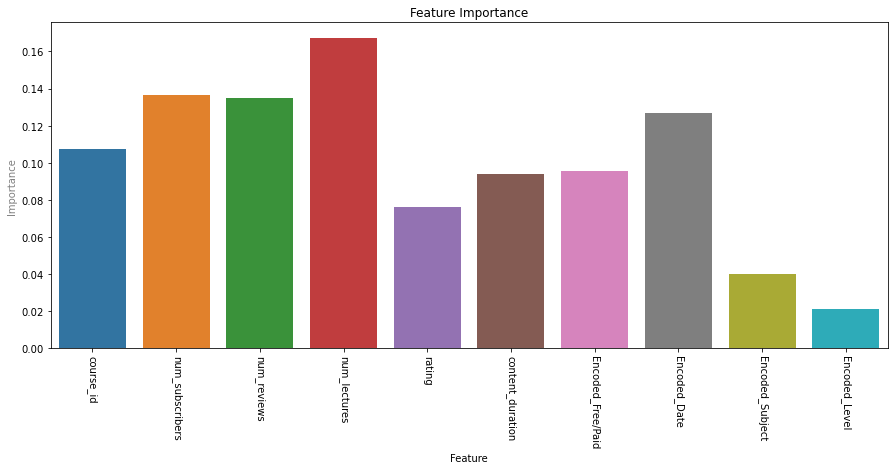

In [141]:
modelreg = RandomForestRegressor(random_state=42)

modelreg.fit(X_train,y_train)

print('Best Accuracy:', 100-mean_absolute_percentage_error(y_test, modelreg.predict(X_test))) 

importance = modelreg.feature_importances_
plt.figure(figsize=(15,6))
sns.barplot(x=[i for i in features],y=importance)
plt.yticks(color='black')
plt.xticks(color='black',rotation=-90)
plt.xlabel(xlabel='Feature')
plt.title(label='Feature Importance')
plt.ylabel(ylabel='Importance',color='grey')
plt.show()

XG Boost model

In [142]:
xgbModel = xg.XGBRegressor(seed=42)

xgbModel.fit(X_train,y_train)

print('Best Accuracy:', 100-mean_absolute_percentage_error(y_test, xgbModel.predict(X_test))) 


Best Accuracy: 98.73389628863751


In [143]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
def run_experiment(model):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print('mean_absolute_error: %.3f' % mean_absolute_error(y_test, y_pred))
    print('mean_squared_error: %.3f' % mean_squared_error(y_test, y_pred))
    print('r2_score: %.3f' % r2_score(y_test, y_pred))
    print('mean_absolute_percentage_error: %.3f' % mean_absolute_percentage_error(y_test, y_pred))

    

Performance comparison of all three algorithms: 

In [150]:
print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
print("Performance of ANN:")
run_experiment(model)
print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")

print("Performance of RandomForestRegressor:    ")
run_experiment(modelreg)
print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
print("Performance of XGBRegressor:")
run_experiment(xgbModel)



|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Performance of ANN:
35/35 [==============================] - 0s 1ms/step
mean_absolute_error: 0.631
mean_squared_error: 0.713
r2_score: 0.286
mean_absolute_percentage_error: 1.286
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Performance of RandomForestRegressor:    


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6896\2062030237.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


mean_absolute_error: 0.582
mean_squared_error: 0.651
r2_score: 0.348
mean_absolute_percentage_error: 1.140
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Performance of XGBRegressor:
mean_absolute_error: 0.633
mean_squared_error: 0.746
r2_score: 0.254
mean_absolute_percentage_error: 1.266
